In [2]:
import pandas as pd
import numpy as np

In [3]:
dt=pd.read_csv("C:/Users/atulp/Downloads/heart.csv")
dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [4]:
dt.shape

(1025, 14)

In [5]:
dt.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
dt.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

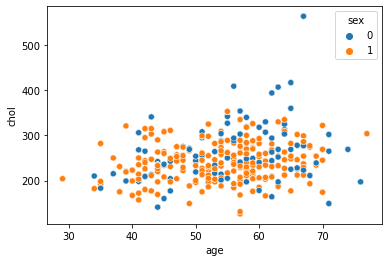

In [9]:
sns.scatterplot(x='age',y='chol',data=dt,hue="sex")
plt.show()

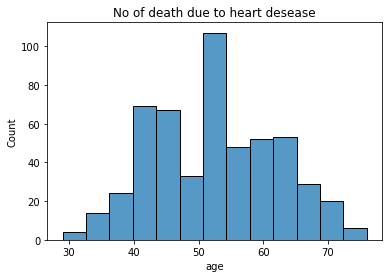

In [10]:
Deceased = dt.age.where(dt.target==1)
sns.histplot(Deceased)
plt.title('No of death due to heart desease')
plt.show()

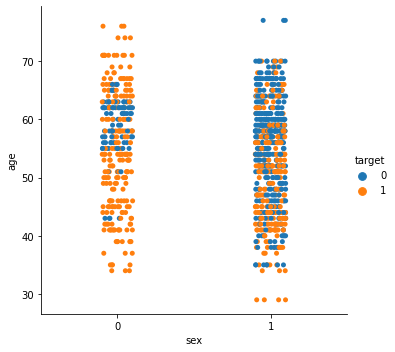

In [11]:
sns.catplot(x='sex',y='age',hue='target',data=dt)

In [12]:
# Here sex (1 = male; 0 = female) and target (1 = died; 0 = lived)
#This plot shows count of male female died at different age

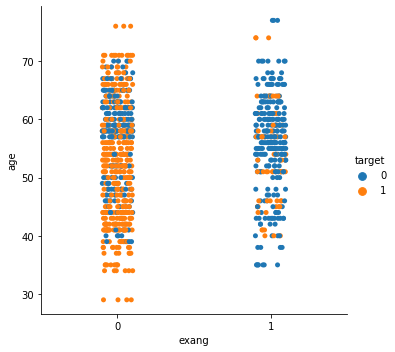

In [13]:
sns.catplot(x='exang',y='age',hue='target',data=dt)

In [14]:
# Here exang (1 = yes 0 = no) and target (1 = died; 0 = lived)
# This plot shows different age group of people who survied because of exercie

In [22]:
x = dt.drop(columns=['target'])
y = dt.target

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [26]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=100)

In [33]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(x_test)

In [38]:
accuracy_score(y_test,y_pred)

0.8793774319066148

In [43]:
y_test.head()

960    1
48     1
886    0
981    0
973    1
Name: target, dtype: int64

In [44]:
y_pred[0:5]

array([1, 1, 0, 0, 1], dtype=int64)

In [48]:
confusion_matrix(y_test,y_pred)

array([[ 97,  22],
       [  9, 129]], dtype=int64)

In [50]:
auc = roc_auc_score(y_test,y_pred)
auc

0.8749543295579102

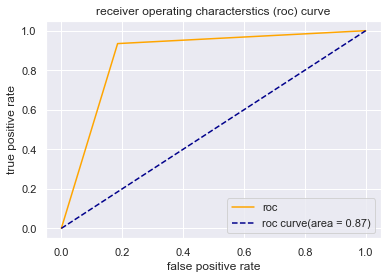

In [93]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,color = 'orange',label = 'roc')
plt.plot([0,1],[0,1],color = 'darkblue', linestyle = '--', label = 'roc curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate') 
plt.title('receiver operating characterstics (roc) curve')
plt.legend()
plt.show()

In [80]:
f1_score(y_test,y_pred)

0.8927335640138409

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86       119
           1       0.85      0.93      0.89       138

    accuracy                           0.88       257
   macro avg       0.88      0.87      0.88       257
weighted avg       0.88      0.88      0.88       257

